## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2023:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOGL)
* Meta (NASDAQ:META).

Using Pandas, yfinance, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2023. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

#### Step 2: Import Financial Package
Import the `yfinance` module as `yf`. (you can install the `yfinance` package by entering `pip3 install yfinance` in the command line or `!pip3 install yfinance` in the Jupyter Notebook)

You can learn more about the yfinance package by visiting its [github homepage](https://github.com/ranaroussi/yfinance#readme). Also take a look at the [dependency requirements](https://github.com/ranaroussi/yfinance#requirements) to check that your Python, Pandas, and Numpy versions are compatible for working with yfinance.

In [2]:
import yfinance as yf

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2023 named `start_date` and a datetime object representing July 1st, 2023 named `end_date`.
#### Step 3: Retrieve Data
Call the function `yf.download()` to pull historical data for multiple stocks. `.download()` should take three arguments &mdash; the first is a positional argument that holds the list of stock symbols for which we'd like to download data. The second and third arguments should be keyword arguments `start` and `end`, which should be set to `start_date` and `end_date` respectively. Save the result to a variable called `stock_data`. You can read more about the `.download()` method on the [yfinance wiki](https://github.com/ranaroussi/yfinance/wiki/Tickers#download)
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [4]:
#download stock data for Microsoft, Amazon, Apple, Google and Facebook (Meta) for 1 January 2023 - 1 July 2023
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOGL', 'META']
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 1)
stock_data = yf.download(symbols, start_date, end_date)
closing_price = stock_data['Close']
print(stock_data)
print(closing_price)
#'Adj Close' not available in imported data, gives Key Error when trying to print. I am going to use 'Close' instead.

/var/folders/5c/0ynzbnwj2h95wwc27y0fc6cw0000gn/T/ipykernel_91734/1646777100.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbols, start_date, end_date)
[*********************100%***********************]  5 of 5 completed

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2023-01-03  123.470619   85.820000   88.588707  124.059402  234.808975   
2023-01-04  124.744110   85.139999   87.554901  126.675056  224.537659   
2023-01-05  123.421249   83.120003   85.686119  126.247398  217.882874   
2023-01-06  127.962418   86.080002   86.819313  129.310577  220.450699   
2023-01-09  128.485641   87.360001   87.495255  128.763596  222.597076   
...                ...         ...         ...         ...         ...   
2023-06-26  183.433426  127.330002  117.634499  276.950653  323.568634   
2023-06-27  186.195755  129.179993  117.624565  285.483795  329.447266   
2023-06-28  187.373978  129.039993  119.463539  283.733368  330.707672   
2023-06-29  187.710602  127.900002  118.389969  279.993958  329.919830   
2023-06-30  192.047180  130.360001  11

### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

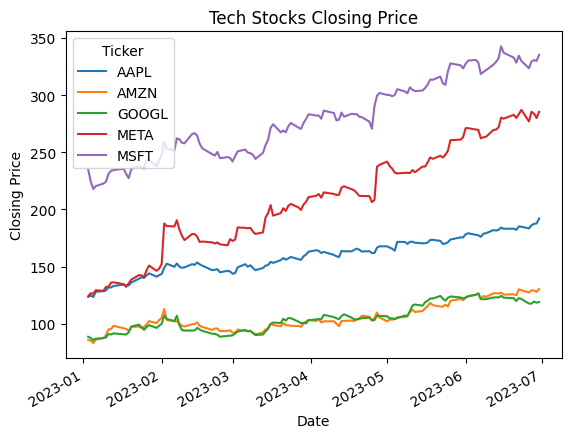

In [5]:
# Plotting the closing prices over time period
closing_price.plot()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tech Stocks Closing Price')
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

Ticker          AAPL      AMZN     GOOGL      META      MSFT
Date                                                        
2023-01-03       NaN       NaN       NaN       NaN       NaN
2023-01-04  0.010314 -0.007924 -0.011670  0.021084 -0.043743
2023-01-05 -0.010605 -0.023726 -0.021344 -0.003376 -0.029638
2023-01-06  0.036794  0.035611  0.013225  0.024263  0.011785
2023-01-09  0.004089  0.014870  0.007786 -0.004230  0.009736
...              ...       ...       ...       ...       ...
2023-06-26 -0.007553 -0.015464 -0.032696 -0.035535 -0.019163
2023-06-27  0.015059  0.014529 -0.000084  0.030811  0.018168
2023-06-28  0.006328 -0.001084  0.015634 -0.006131  0.003826
2023-06-29  0.001797 -0.008834 -0.008987 -0.013179 -0.002382
2023-06-30  0.023102  0.019234  0.005038  0.019358  0.016386

[124 rows x 5 columns]


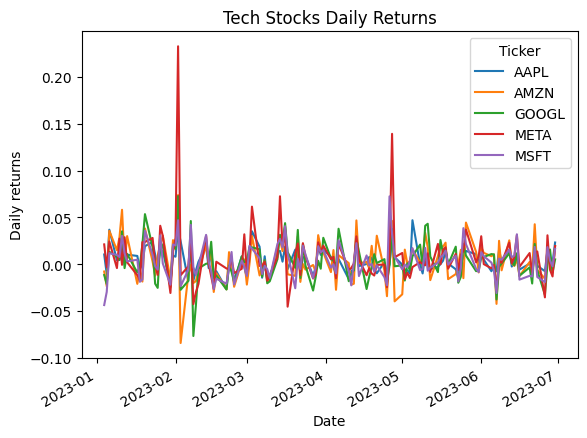

In [6]:
# Calculating daily simple rate of return and plotting it all on one graph
returns = stock_data['Close'].pct_change()
print(returns)
returns.plot()
plt.xlabel('Date')
plt.ylabel('Daily returns')
plt.title('Tech Stocks Daily Returns')
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

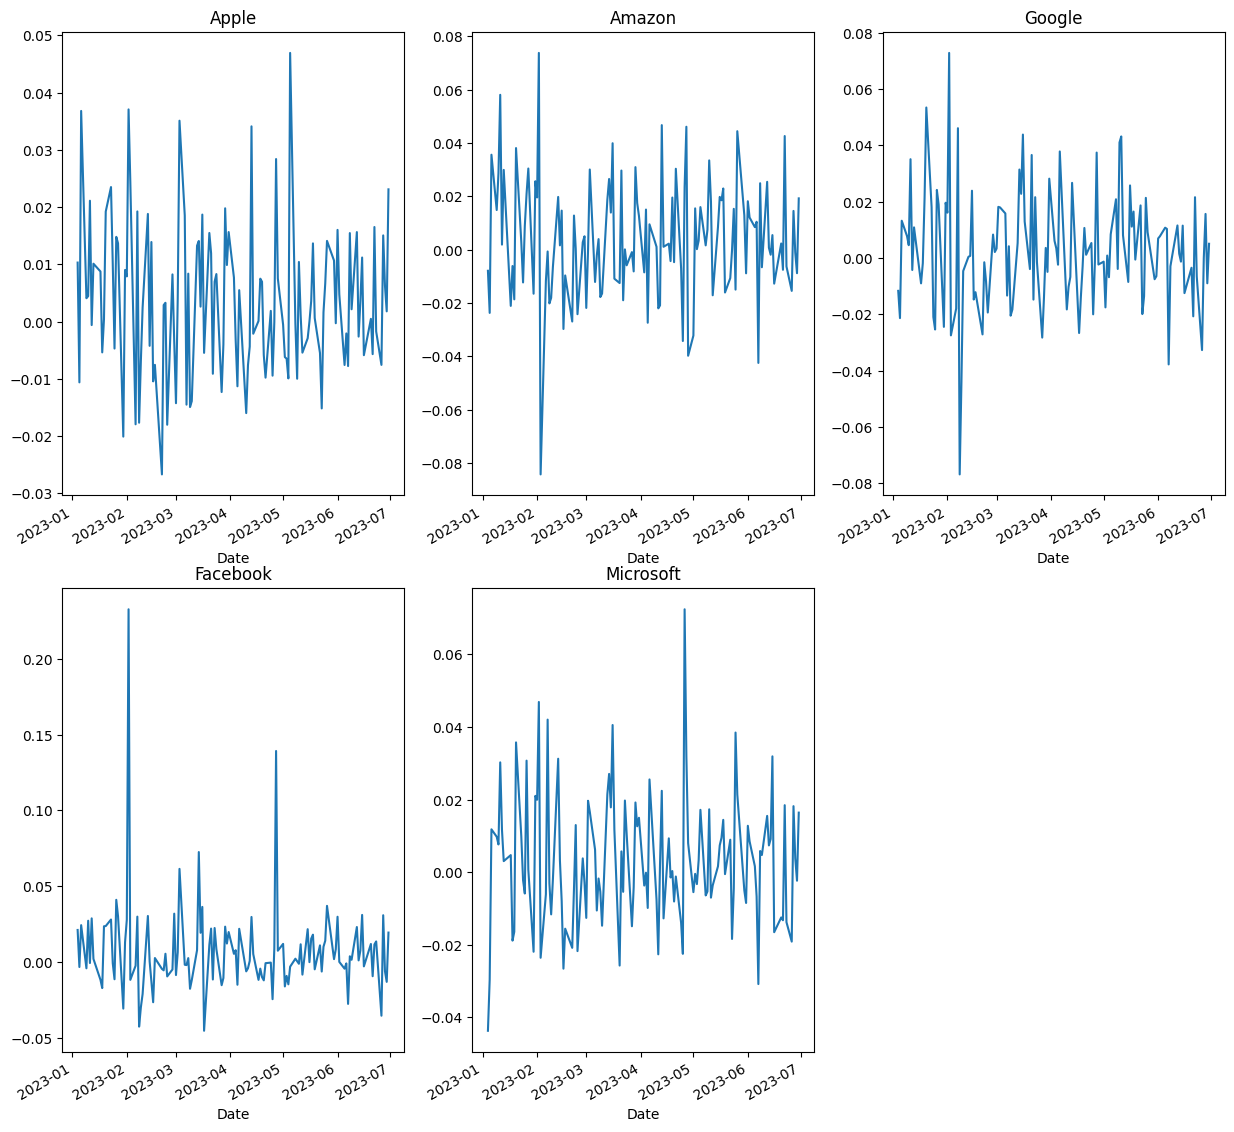

In [7]:
# Subplots give better visibility and easier comparison so we have created subplots for each stock
plt.figure(figsize = (15, 15))
plt.subplot(2, 3, 1)
returns['AAPL'].plot()
plt.title('Apple')
plt.subplot(2, 3, 2)
returns['AMZN'].plot()
plt.title('Amazon')
plt.subplot(2, 3, 3)
returns['GOOGL'].plot()
plt.title('Google')
plt.subplot(2, 3, 4)
returns['META'].plot()
plt.title('Facebook')
plt.subplot(2, 3, 5)
returns['MSFT'].plot()
plt.title('Microsoft')
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [8]:
# We calculated average return across the period of 6 months for each stock
average_return = returns.mean()
print(average_return)

Ticker
AAPL     0.003682
AMZN     0.003652
GOOGL    0.002619
META     0.007224
MSFT     0.003060
dtype: float64


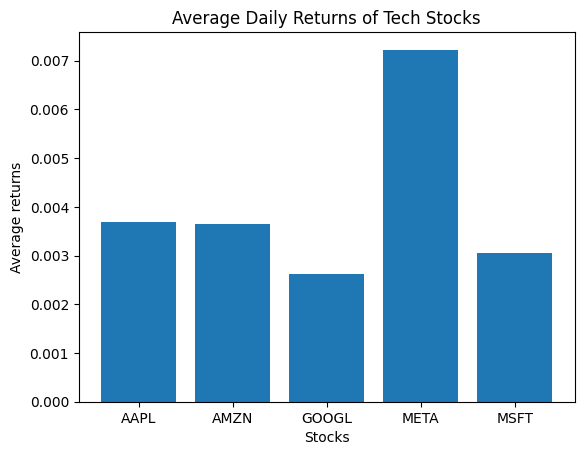

In [9]:
#plot the bar chart for average return
plt.bar(range(len(average_return)), average_return)

#set x-axis tick positions and labels
plt.xticks(range(len(average_return)), average_return.keys())

#add labels
plt.xlabel('Stocks')
plt.ylabel('Average returns')
plt.title('Average Daily Returns of Tech Stocks')

#show bar chart
plt.show()


In [10]:
# Meta has the highest return over the period selected so based solely on that metric, Meta would have been a good investment
# Google was the lowest.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [11]:
#Variance measures how far a set of numbers are spread out from their average. 
#In finance, this is used to determine the volatility of investments.

variance = returns.var()
print(variance)

Ticker
AAPL     0.000171
AMZN     0.000500
GOOGL    0.000440
META     0.000931
MSFT     0.000324
dtype: float64


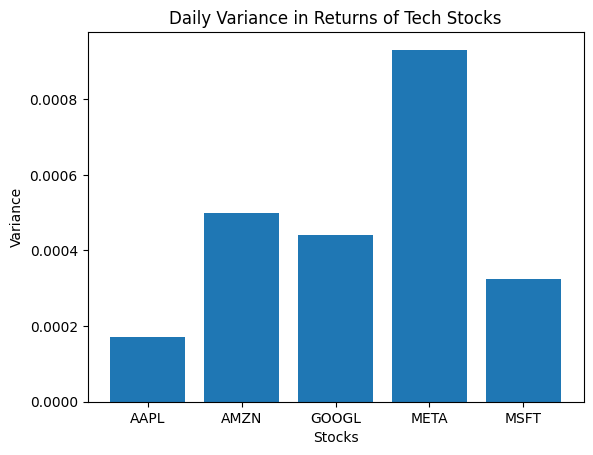

In [12]:
#plot the bar chart
plt.bar(range(len(variance)), variance)

#set x-axis tick positions and labels
plt.xticks(range(len(variance)), variance.keys())

#add labels
plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Daily Variance in Returns of Tech Stocks')

#show bar chart
plt.show()


In [13]:
# Meta that had the highest average return also has the highest variance, indicating it is the riskiest stock.
# Apple has the lowest variance but second highest return, hence it's less risky than some of the other stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [14]:
# standard deviation is a measure of volatility - it measures dispersion of returns around its mean. 
# It's measured in original units of the data while variance is expressed in squared units.

In [15]:
std_dev = returns.std()
print(std_dev)

Ticker
AAPL     0.013065
AMZN     0.022353
GOOGL    0.020977
META     0.030510
MSFT     0.017993
dtype: float64


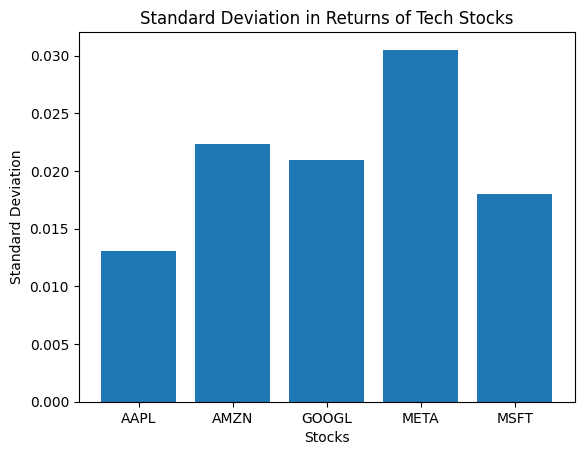

In [16]:
#plot the bar chart
plt.bar(range(len(std_dev)), std_dev)

#set x-axis tick positions and labels
plt.xticks(range(len(std_dev)), std_dev.keys())

#add labels
plt.xlabel('Stocks')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation in Returns of Tech Stocks')

#show bar chart
plt.show()

In [17]:
# standard deviation is a square root of variance, so the analysis is the same as above. 
# The investment decision depends on the risk appetite of the investor as riskier stocks have higher returns. 
# Apple has the best risk-return ratio out of those five stocks.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [18]:
#correlation provides information on strength and the direction of the relationships between different stocks

In [19]:
correlation = returns.corr()
correlation

Ticker,AAPL,AMZN,GOOGL,META,MSFT
Ticker,,,,,
AAPL,1.000000,0.555239,0.599270,0.578896,0.583447
AMZN,0.555239,1.000000,0.630500,0.578416,0.644661
GOOGL,0.599270,0.630500,1.000000,0.621096,0.628548
META,0.578896,0.578416,0.621096,1.000000,0.533364
MSFT,0.583447,0.644661,0.628548,0.533364,1.000000


In [20]:
# all stocks are moderately positively correlated which makes sense, since they are all tech companies serving different types of markets
# Microsoft and Amazon have the strongest positive correlation whereas Meta and Microsoft have the weakest